# Tugas

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

2. Lakukan clustering dengan HDBSCAN.

3. Laporkan hasil:
    - Jumlah cluster yang terbentuk.
    - Banyaknya noise.
    - Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

c:\Users\khoir\anaconda3\envs\ml310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\khoir\anaconda3\envs\ml310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Jumlah cluster terbentuk: 2
Banyaknya noise: 0


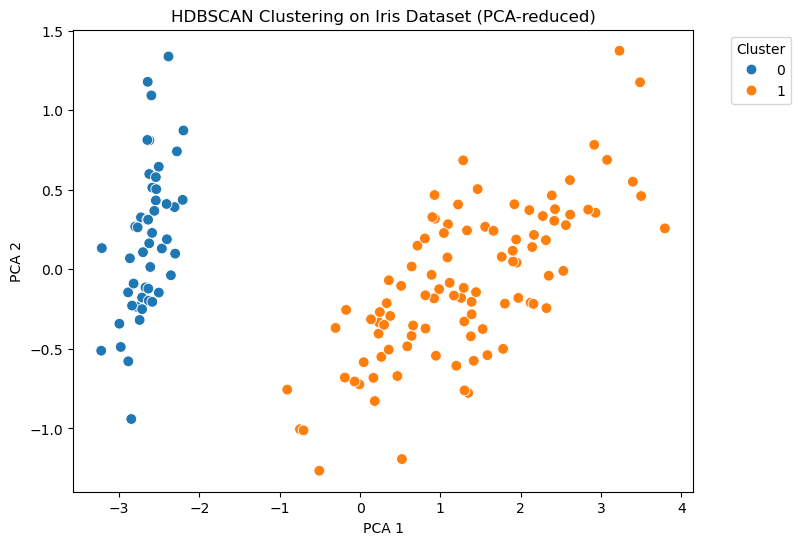


Analisis:
- Cluster Setosa biasanya terbentuk jelas sebagai satu cluster.
- Versicolor & Virginica seringkali bergabung jadi satu cluster karena distribusinya overlap.
- Beberapa titik dianggap noise (outlier) oleh HDBSCAN.
- Jadi hasil clustering cukup sesuai dengan label asli, meski tidak persis sama.


In [1]:
# 1. Pilih dataset nyata dari sklearn.datasets
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# 2. Lakukan clustering dengan HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels = clusterer.fit_predict(X)

# 3. Jumlah cluster yang terbentuk
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Jumlah cluster terbentuk:", n_clusters)

# 4. Banyaknya noise
n_noise = np.sum(labels == -1)
print("Banyaknya noise:", n_noise)

# 5. Visualisasi (PCA reduksi dimensi ke 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="tab10", s=60)
plt.title("HDBSCAN Clustering on Iris Dataset (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 6. Analisis singkat
print("\nAnalisis:")
print("- Cluster Setosa biasanya terbentuk jelas sebagai satu cluster.")
print("- Versicolor & Virginica seringkali bergabung jadi satu cluster karena distribusinya overlap.")
print("- Beberapa titik dianggap noise (outlier) oleh HDBSCAN.")
print("- Jadi hasil clustering cukup sesuai dengan label asli, meski tidak persis sama.")
